[*********************100%***********************]  1 of 1 completed

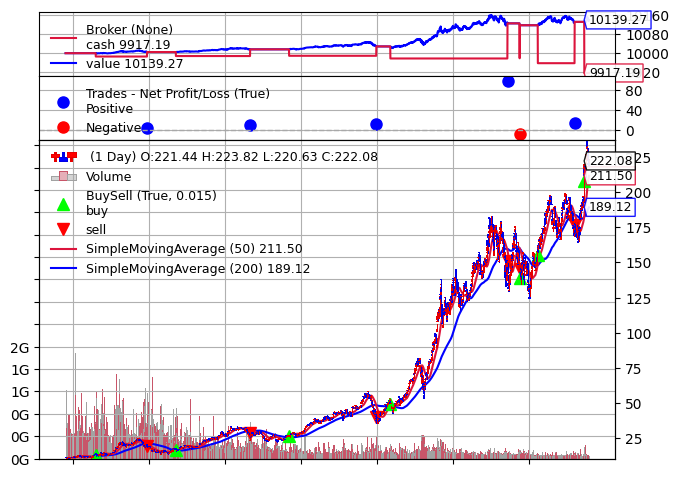

[[<Figure size 640x480 with 4 Axes>]]

In [2]:
import backtrader as bt
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

# Set Matplotlib backend
# import matplotlib
# matplotlib.use('Agg')  # Change this to 'Qt5Agg' if you want an interactive plot and are not in a headless environment
# import matplotlib.pyplot as plt
%matplotlib inline

# Download stock data
data = yf.download("AAPL", start="2010-01-01", end= "2024-08-01")

# Calculate moving averages
data['SMA_50'] = data['Close'].rolling(window=50).mean()
data['SMA_200'] = data['Close'].rolling(window=200).mean()
data.dropna(inplace=True)  # Drop NaN values

# Check data length before proceeding
if len(data) < 200:
    raise ValueError("Not enough data to calculate indicators.")

# Prepare data for Backtrader
data.reset_index(inplace=True)
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)
data_feed = bt.feeds.PandasData(dataname=data)

class SmaCross(bt.SignalStrategy):
    def __init__(self):
        self.sma50 = bt.indicators.SimpleMovingAverage(self.data.close, period=50)
        self.sma200 = bt.indicators.SimpleMovingAverage(self.data.close, period=200)

    def next(self):
        # Ensure we have enough data for indicators
        if len(self.data) < 200:
            return  # Not enough data to proceed

        # Implement the trading logic
        if not self.position:  # Not in the market
            if self.sma50[0] > self.sma200[0]:  # Buy signal
                self.buy()
        else:  # In the market
            if self.sma50[0] < self.sma200[0]:  # Sell signal
                self.sell()

# Create a Cerebro engine instance
cerebro = bt.Cerebro()
cerebro.adddata(data_feed)
cerebro.addstrategy(SmaCross)
cerebro.broker.setcash(10000.0)  # Initial cash
cerebro.run()
#cerebro.plot(style='candlestick',barup='red',bardown='blue',xtight=True,ytight=True, grid=True)
cerebro.plot(iplot=False, style='candlestick', barup='red', bardown='blue', xtight=True, ytight=True, grid=True)